In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import calendar
from ast import literal_eval
import json

In [2]:
days = list(calendar.day_abbr)
months = list(calendar.month_abbr)

In [3]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df['count'] = 1
df = df.set_index('login_time')

In [5]:
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [6]:
ldf = df.groupby(pd.Grouper(freq='15Min')).aggregate(np.sum) 
ldf['count'] = ldf['count'].fillna(0)
ldf.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


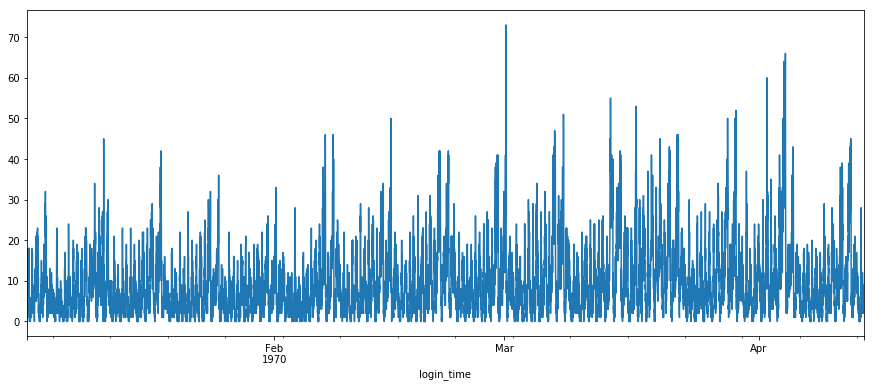

In [7]:
plt.figure(figsize=(15,6))
ldf['count'].plot()

In [8]:
ldf['timestamp'] = pd.to_datetime(ldf.index)

In [9]:
ldf['month'] = ldf['timestamp'].apply(lambda x: months[x.month])
ldf['day'] = ldf['timestamp'].apply(lambda x: days[x.weekday()])
ldf['hour'] = ldf['timestamp'].apply(lambda x: x.hour)
ldf['time'] = ldf['timestamp'].apply(lambda x: x.time())

In [10]:
ldf.head()

,count,timestamp,month,day,hour,time
login_time,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,Jan,Thu,20,20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00,Jan,Thu,20,20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00,Jan,Thu,20,20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00,Jan,Thu,20,20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00,Jan,Thu,21,21:00:00


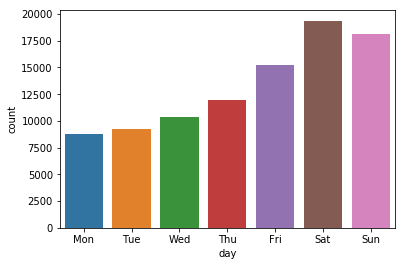

In [11]:
day_counts = ldf.groupby('day')['count'].sum()
sns.barplot(x=day_counts.index, y=day_counts, order=days)

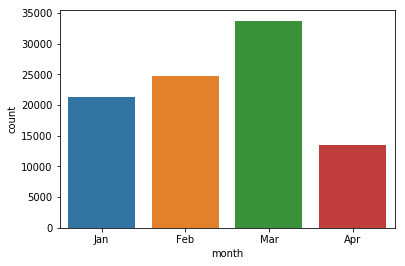

In [12]:
month_counts = ldf.groupby('month')['count'].sum()
sns.barplot(x=month_counts.index, y=month_counts, order=['Jan', 'Feb', 'Mar', 'Apr'])

In [13]:
hour_counts = ldf.groupby('hour')['count'].sum()

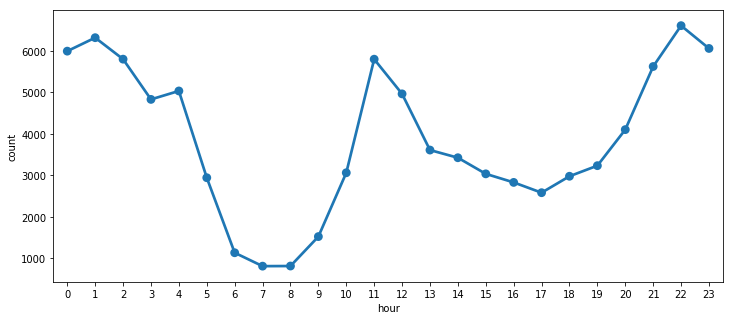

In [14]:
plt.figure(figsize=(12,5))
sns.pointplot(x=hour_counts.index, y=hour_counts)

In [15]:
time_counts = ldf.groupby('time')['count'].sum()
time_counts.sort_values(ascending=False).head(10)

time
22:30:00    1684
01:30:00    1673
22:15:00    1652
22:45:00    1637
22:00:00    1634
11:30:00    1622
01:15:00    1598
23:00:00    1573
11:45:00    1570
21:45:00    1554
Name: count, dtype: int64

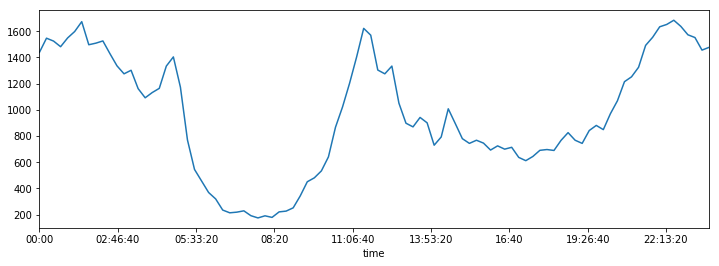

In [16]:
plt.figure(figsize=(12,4))
time_counts.plot()

In [18]:
data = open('ultimate_data_challenge.json', 'r').readline()

In [19]:
data = json.loads(data)

In [20]:
df2 = pd.DataFrame(data)
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
df2['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [23]:
df2['phone'] = df2['phone'].fillna('iPhone')

In [24]:
df2['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

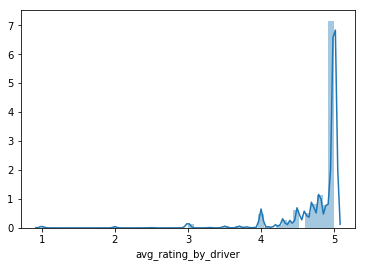

In [25]:
sns.distplot(df2[df2['avg_rating_by_driver'].notnull()]['avg_rating_by_driver'])

In [26]:
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].median())

In [27]:
df2['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

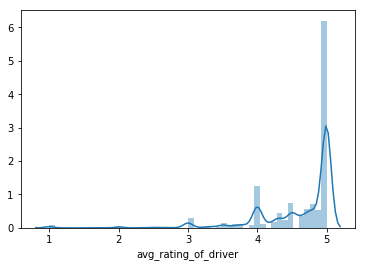

In [28]:
sns.distplot(df2[df2['avg_rating_of_driver'].notnull()]['avg_rating_of_driver'])

In [29]:
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].mean())

In [30]:
df2['signup_date'] = df2['signup_date'].apply(lambda x: pd.Timestamp(x, tz=None))
df2['last_trip_date'] = df2['last_trip_date'].apply(lambda x: pd.Timestamp(x, tz=None))

In [31]:
df2['last_trip_date'].sort_values(ascending=False).head(10)

45357   2014-07-01
22735   2014-07-01
14473   2014-07-01
38651   2014-07-01
45126   2014-07-01
14419   2014-07-01
38661   2014-07-01
45143   2014-07-01
45154   2014-07-01
45155   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [32]:
df2['retained'] = df2['last_trip_date'].apply(lambda x: 1 if x >= pd.Timestamp('2014-06-01', tz=None) else 0)

In [33]:
df2['retained'].value_counts()

0    31196
1    18804
Name: retained, dtype: int64

In [34]:
df2 = df2.drop('signup_date', axis=1)

In [35]:
df2 = df2.drop('last_trip_date', axis=1)

In [36]:
df2['ultimate_black_user'] = df2['ultimate_black_user'].apply(lambda x: 1 if x else 0)

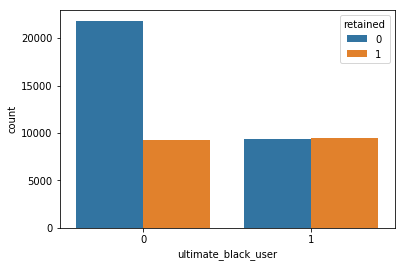

In [37]:
sns.countplot(x='ultimate_black_user', data=df2, hue='retained')

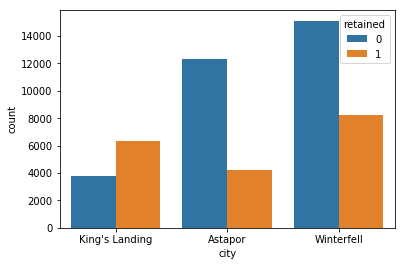

In [38]:
sns.countplot(x='city', data=df2, hue='retained')

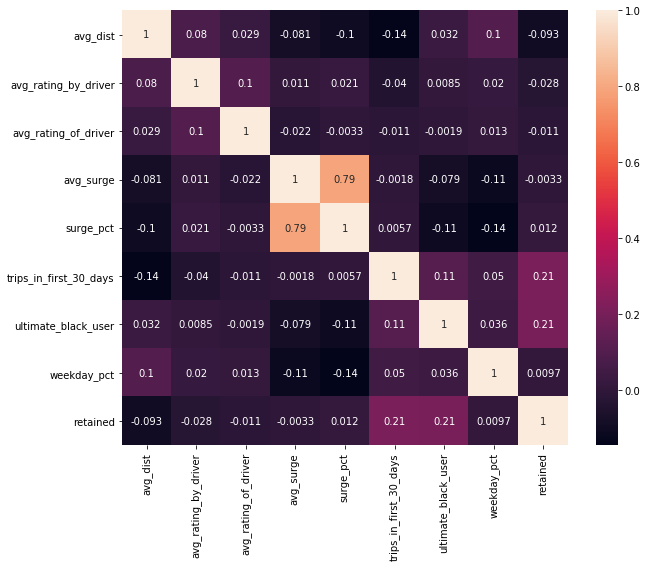

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True)

In [40]:
df2 = pd.get_dummies(df2, prefix='is')

In [41]:
X, y = df2.drop(['retained', 'avg_surge'], axis=1), df2['retained']

In [42]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.85, test_size=0.15, stratify=y)

In [43]:
classifier = GradientBoostingClassifier(verbose=True, n_estimators=200)
classifier.fit(train_X, train_y)
classifier.score(test_X, test_y)

      Iter       Train Loss   Remaining Time 
         1           1.2792           12.28s
         2           1.2427            9.00s
         3           1.2110            7.92s
         4           1.1834            7.32s
         5           1.1612            6.99s
         6           1.1409            6.77s
         7           1.1229            6.64s
         8           1.1074            6.48s
         9           1.0884            6.36s
        10           1.0761            6.23s
        20           0.9913            5.40s
        30           0.9582            4.95s
        40           0.9400            4.66s
        50           0.9291            4.33s
        60           0.9218            3.95s
        70           0.9169            3.60s
        80           0.9131            3.27s
        90           0.9094            2.95s
       100           0.9065            2.65s
       200           0.8876            0.00s


0.7837333333333333

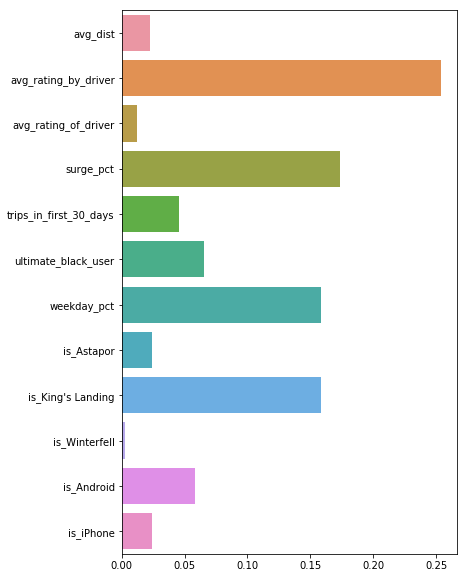

In [44]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=classifier.feature_importances_)